# **Module_2: Exploratory Data Analysis**
## **B. Exploratoty Data Analysis**
### **1- Load dataset into a DataFrame**

In [108]:
import pandas as pd
import os

os.chdir('/home/miguel/zrive-ds')

dataset_path = "data/groceries/sampled_box_builder_df.csv"
df = pd.read_csv(dataset_path)

# Display basic information about the dataset
print(df.shape)
print("\nDataset Info:")
df.info()

KeyboardInterrupt: 

### **2- Check for missing values and handle them**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Display missing value summary
missing_summary = pd.DataFrame({"Missing Count": missing_values, "Missing Percentage": missing_percentage})
print("Missing Values Summary:")
print(missing_summary)


Missing Values Summary:
                                  Missing Count  Missing Percentage
variant_id                                    0                 0.0
product_type                                  0                 0.0
order_id                                      0                 0.0
user_id                                       0                 0.0
created_at                                    0                 0.0
order_date                                    0                 0.0
user_order_seq                                0                 0.0
outcome                                       0                 0.0
ordered_before                                0                 0.0
abandoned_before                              0                 0.0
active_snoozed                                0                 0.0
set_as_regular                                0                 0.0
normalised_price                              0                 0.0
discount_pct            

### **3- Check data types**

In [90]:
# Check data types
print("Data Types:")
print(df.dtypes)

Data Types:
variant_id                            int64
product_type                         object
order_id                              int64
user_id                               int64
created_at                           object
order_date                           object
user_order_seq                        int64
outcome                             float64
ordered_before                      float64
abandoned_before                    float64
active_snoozed                      float64
set_as_regular                      float64
normalised_price                    float64
discount_pct                        float64
vendor                               object
global_popularity                   float64
count_adults                        float64
count_children                      float64
count_babies                        float64
count_pets                          float64
people_ex_baby                      float64
days_since_purchase_variant_id      float64
avg_days_to_buy_vari

In [ ]:
if df['set_as_regular'].unique()[0] == 0 and df['set_as_regular'].unique()[1] == 1: df['set_as_regular'] = df['set_as_regular'].astype('uint8')
if df['active_snoozed'].unique()[0] == 0 and df['active_snoozed'].unique()[1] == 1: df['active_snoozed'] = df['active_snoozed'].astype('uint8')
if df['abandoned_before'].unique()[0] == 0 and df['abandoned_before'].unique()[1] == 1: df['abandoned_before'] = df['abandoned_before'].astype('uint8')
if df['ordered_before'].unique()[0] == 0 and df['ordered_before'].unique()[1] == 1: df['ordered_before'] = df['ordered_before'].astype('uint8')
if df['outcome'].unique()[0] == 0 and df['outcome'].unique()[1] == 1: df['outcome'] = df['outcome'].astype('uint8')

df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d %H:%M:%S')
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d %H:%M:%S')

print(df.dtypes)

variant_id                                   int64
product_type                                object
order_id                                     int64
user_id                                      int64
created_at                          datetime64[ns]
order_date                          datetime64[ns]
user_order_seq                               int64
outcome                                      uint8
ordered_before                               uint8
abandoned_before                             uint8
active_snoozed                               uint8
set_as_regular                               uint8
normalised_price                           float64
discount_pct                               float64
vendor                                      object
global_popularity                          float64
count_adults                               float64
count_children                             float64
count_babies                               float64
count_pets                     

Logical features converted to `uint8` looking for memory efficience.

### **3- Check for outliers**

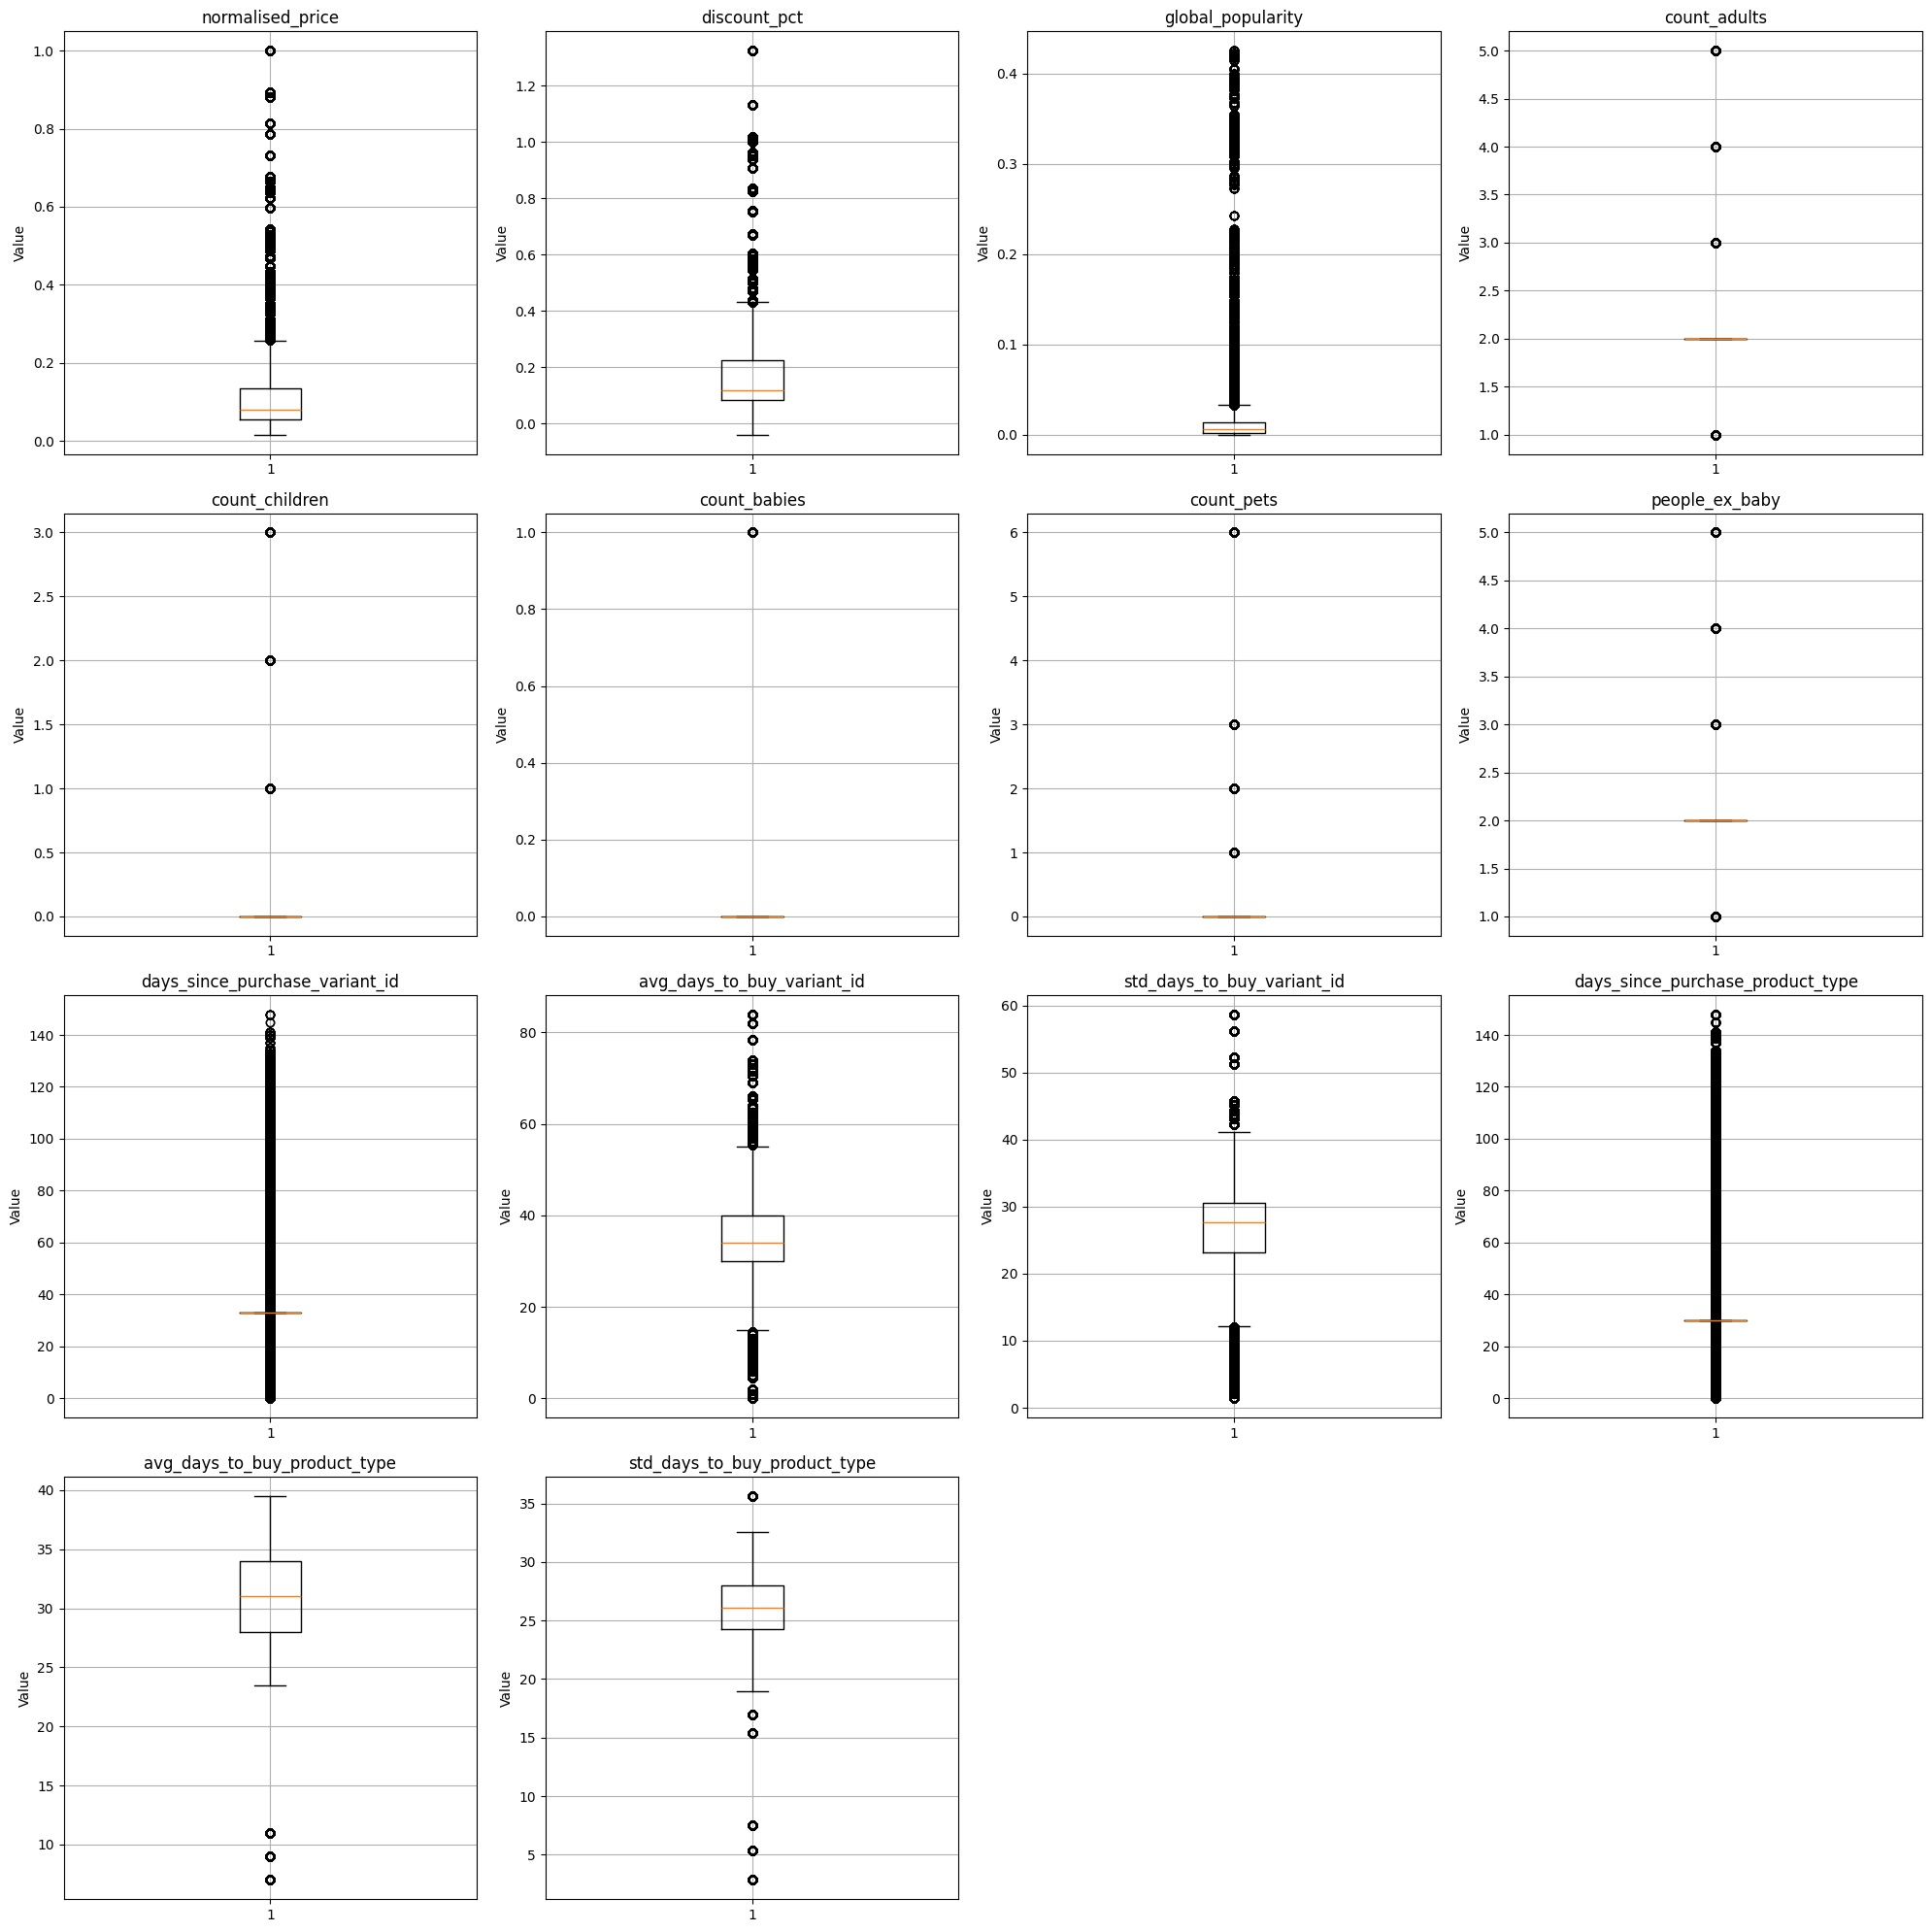

In [ ]:
import matplotlib.pyplot as plt

# List of columns to plot
numerical_features = ['normalised_price', 'discount_pct', 'global_popularity', 'count_adults',  
                   'count_children', 'count_babies', 'count_pets', 'people_ex_baby',
                   'days_since_purchase_variant_id', 'avg_days_to_buy_variant_id',
                   'std_days_to_buy_variant_id', 'days_since_purchase_product_type', 
                   'avg_days_to_buy_product_type', 'std_days_to_buy_product_type']

num_plots = len(numerical_features)
rows = (num_plots // 4) + (num_plots % 4 > 0) 
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5)) 

axes = axes.flatten()

for i, column in enumerate(numerical_features):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### **4- Check Target Variable**
Ensure the target variable `outcome` is well-balanced.

In [93]:
print("Target Variable Distribution:")
print(df['outcome'].value_counts(normalize=True) * 100)

Target Variable Distribution:
outcome
0    98.846331
1     1.153669
Name: proportion, dtype: float64


##### **Possible Fixes for Imbalanced Data**

1. **Oversampling**:
   - Duplicate or synthetically generate samples of the minority class to balance the dataset.
   - A common method is **SMOTE (Synthetic Minority Oversampling Technique)**, which creates synthetic samples based on the feature space of existing minority class samples.

2. **Undersampling**:
   - Randomly remove samples from the majority class to balance the dataset.
   - Suitable when the dataset is large and removing data won't lead to a significant loss of information.

3. **Class Weights**:
   - Assign higher weights to the minority class during model training to penalize the model more for misclassifying it.
   - Many machine learning frameworks support this directly, such as scikit-learn's `class_weight='balanced'`.


### **5- Categorical encoding**

In [ ]:
# Check cardinality of categorical features
categorical_features = df.select_dtypes(include='object').columns
for feature in categorical_features:
    print(f"{feature}: {df[feature].nunique()} unique values")

product_type: 62 unique values
vendor: 264 unique values


In [ ]:
# Frequency encoding for 'product_type'
frequency_encoding = df['product_type'].value_counts(normalize=True)
df['product_type_freq'] = df['product_type'].map(frequency_encoding)

# Check the result
print(df[['product_type', 'product_type_freq']].head())

freq_corr = df[['product_type_freq', 'outcome']].corr().iloc[0, 1]
print(f"\nCorrelation between frequency-encoded 'product_type' and 'outcome': {freq_corr:.4f}\n")


# Target encoding for 'product_type'
target_mean = df.groupby('product_type')['outcome'].mean()
df['product_type_target'] = df['product_type'].map(target_mean)

# Check the result
print(df[['product_type', 'product_type_target']].head())

target_corr = df[['product_type_target', 'outcome']].corr().iloc[0, 1]
print(f"\nCorrelation between target-encoded 'product_type' and 'outcome': {target_corr:.4f}")

      product_type  product_type_freq
0  ricepastapulses            0.04447
1  ricepastapulses            0.04447
2  ricepastapulses            0.04447
3  ricepastapulses            0.04447
4  ricepastapulses            0.04447

Correlation between frequency-encoded 'product_type' and 'outcome': 0.0228

      product_type  product_type_target
0  ricepastapulses             0.011983
1  ricepastapulses             0.011983
2  ricepastapulses             0.011983
3  ricepastapulses             0.011983
4  ricepastapulses             0.011983

Correlation between target-encoded 'product_type' and 'outcome': 0.0705


Target encoding is preferred, but it will be important to implement Cross-Validation in order to avoid information leakage.

In [96]:
df.drop(columns=['product_type_freq'], inplace=True)

In [ ]:
# Frequency encoding for 'vendor'
frequency_encoding = df['vendor'].value_counts(normalize=True)
df['vendor_freq'] = df['vendor'].map(frequency_encoding)

# Check the result
print(df[['vendor', 'vendor_freq']].head())

freq_corr = df[['vendor_freq', 'outcome']].corr().iloc[0, 1]
print(f"\nCorrelation between frequency-encoded 'vendor' and 'outcome': {freq_corr:.4f}")


# Target encoding for 'vendor'
target_mean = df.groupby('vendor')['outcome'].mean()
df['vendor_target'] = df['vendor'].map(target_mean)

# Check the result
print(df[['vendor', 'vendor_target']].head())

target_corr = df[['vendor_target', 'outcome']].corr().iloc[0, 1]
print(f"\nCorrelation between target-encoded 'vendor' and 'outcome': {target_corr:.4f}")

        vendor  vendor_freq
0  clearspring     0.014356
1  clearspring     0.014356
2  clearspring     0.014356
3  clearspring     0.014356
4  clearspring     0.014356

Correlation between frequency-encoded 'vendor' and 'outcome': 0.0004
        vendor  vendor_target
0  clearspring       0.010882
1  clearspring       0.010882
2  clearspring       0.010882
3  clearspring       0.010882
4  clearspring       0.010882

Correlation between target-encoded 'vendor' and 'outcome': 0.0998


Once again, target encoding is preferred, but it will be important to implement Cross-Validation in order to avoid information leakage.

In [98]:
df.drop(columns=['vendor_freq'], inplace=True)

### **6- Check correlations**

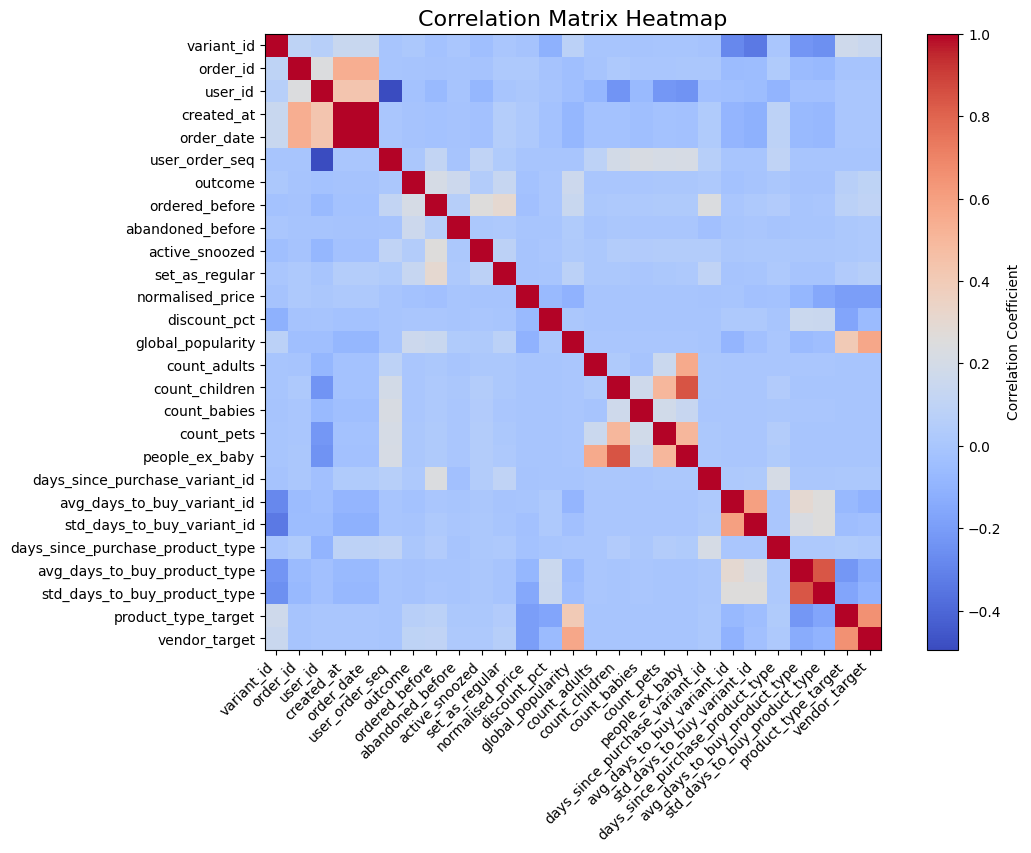

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.drop(columns=['vendor', 'product_type']).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


### **7- Some data knowledge & conclusions**

In [ ]:
binary_cols = df.select_dtypes(include='uint8').columns

for col in binary_cols.drop('outcome'):
    print(f"Value counts {col}: {df[col].value_counts().to_dict()}")
    print(f"Mean outcome by {col} value: {df.groupby(col)['outcome'].mean().to_dict()}")
    print('---------------------------------------------------------------------------')

Value counts ordered_before: {0: 2819658, 1: 60891}
Mean outcome by ordered_before value: {0: 0.008223337723936732, 1: 0.1649669080816541}
---------------------------------------------------------------------------
Value counts abandoned_before: {0: 2878794, 1: 1755}
Mean outcome by abandoned_before value: {0: 0.011106039542947498, 1: 0.717948717948718}
---------------------------------------------------------------------------
Value counts active_snoozed: {0: 2873952, 1: 6597}
Mean outcome by active_snoozed value: {0: 0.011302554809544488, 1: 0.1135364559648325}
---------------------------------------------------------------------------
Value counts set_as_regular: {0: 2870093, 1: 10456}
Mean outcome by set_as_regular value: {0: 0.010668992259135854, 1: 0.24971308339709258}
---------------------------------------------------------------------------


We clearly see a big difference between mean outcome values in products with the following tags: `ordered_before`, `abandoned_before`, `active_snoozed` & `set_as_regular`. Specially interesting results for `abandoned_before`, where 71% of abandoned products are bought in an afterward order. Consider value of building a new logic feature (tag) named `interacted_before` involving these 4 types of user interaction.

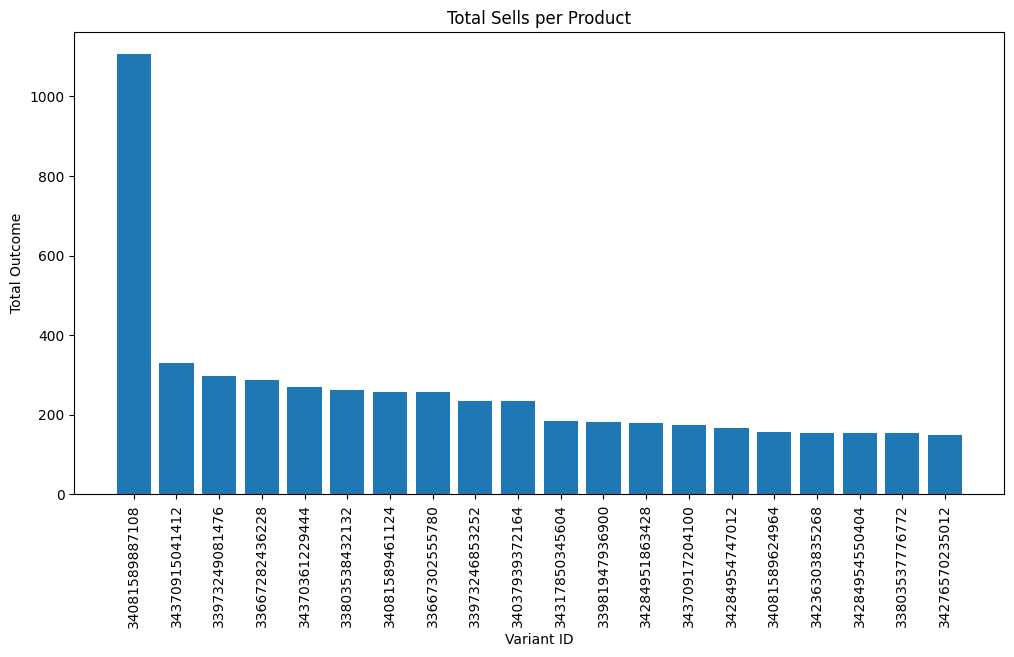

In [ ]:
variant_outcome = df.groupby('variant_id')['outcome'].sum().reset_index()
variant_outcome = variant_outcome.sort_values(by='outcome', ascending=False)
top_variants = variant_outcome.head(20)

plt.figure(figsize=(12, 6))
plt.bar(top_variants['variant_id'].astype(str), top_variants['outcome'])
plt.xticks(rotation=90)
plt.xlabel("Variant ID")
plt.ylabel("Total Outcome")
plt.title("Total Sells per Product")
plt.show()

Here has been displayed the amount of positive outcomes (completed sells) for each product. The first and most remarkable conclusion is that the company has a star-product, which is sold more than twice the second one. Let's find out some info about these top products.

In [112]:
top_variants = variant_outcome.head(5).merge(df[['variant_id', 'product_type', 'vendor']], on='variant_id', how='left')
top_variants = top_variants.drop_duplicates(subset='variant_id')

print("\nTop 5 Products:")
print(top_variants.to_string(index=False))


Top 5 Products:
    variant_id  outcome            product_type         vendor
34081589887108     1106 longlifemilksubstitutes          oatly
34370915041412      331       tinspackagedfoods          mutti
33973249081476      297     condimentsdressings          heinz
33667282436228      288      kitchenrolltissues thecheekypanda
34370361229444      270              toiletroll  whogivesacrap


From here we know that the star-product is a pack of oat milk.

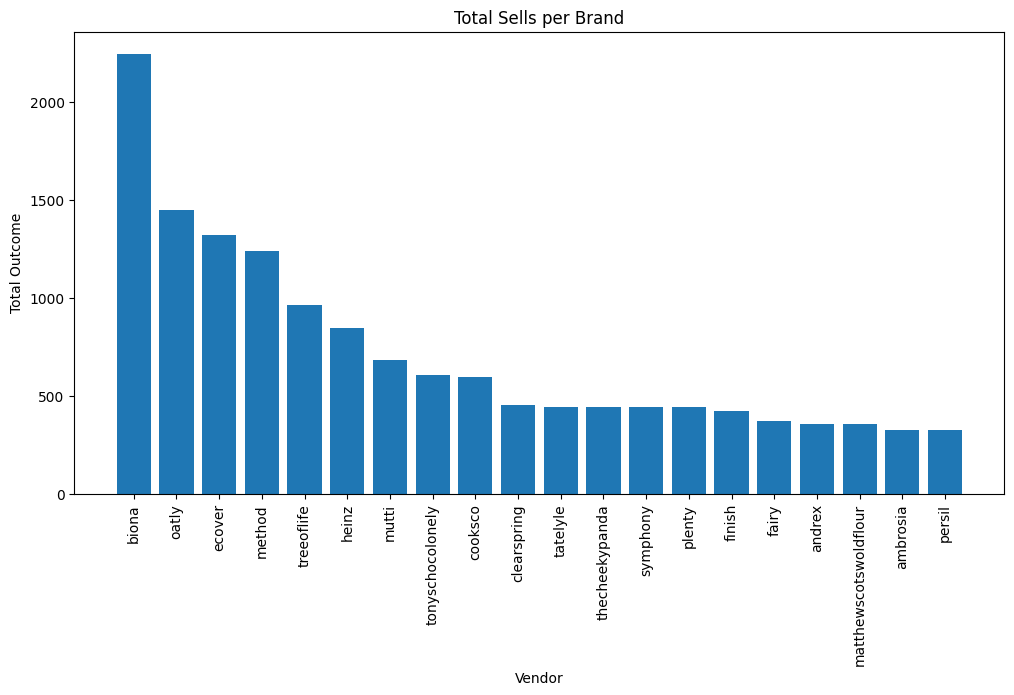

In [114]:
vendor_outcome = df.groupby('vendor')['outcome'].sum().reset_index()
vendor_outcome = vendor_outcome.sort_values(by='outcome', ascending=False)
top_vendors = vendor_outcome.head(20)

plt.figure(figsize=(12, 6))
plt.bar(top_vendors['vendor'].astype(str), top_vendors['outcome'])
plt.xticks(rotation=90)
plt.xlabel("Vendor")
plt.ylabel("Total Outcome")
plt.title("Total Sells per Brand")
plt.show()

From this bar graph, which plots the top-selled brands at our supermarket, we can understand better our market orientation: the top 5 selled brands are all related with eco/bio products, so it is a good assumption that our company aims at that client profile. If not, there would be some important questions to answer: why are we engaging a determined style of user? is this positive for the company? should we increase our offer of bio/eco products?

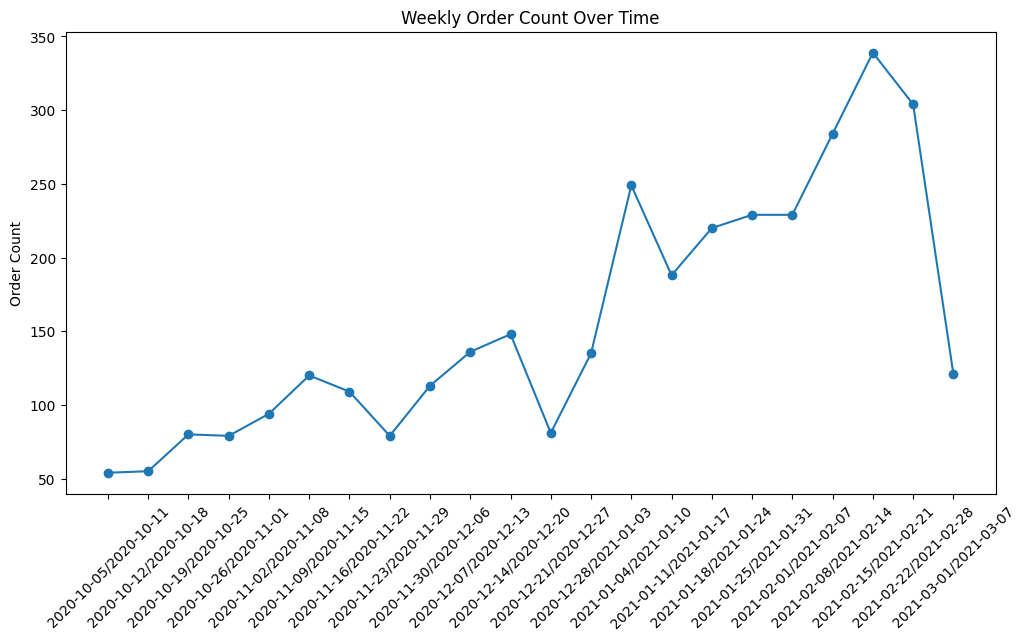

In [120]:
monthly_orders = df.groupby(df['order_date'].dt.to_period("W"))['order_id'].nunique().reset_index()
monthly_orders['order_date'] = monthly_orders['order_date'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_orders['order_date'], monthly_orders['order_id'], marker='o', linestyle='-')
plt.ylabel("Order Count")
plt.title("Weekly Order Count Over Time")
plt.xticks(rotation=45)  
plt.show()

Looking at this plot, it is easy to figure out that within this period (Nov 2020 - Mar 2021, COVID pandemic period) the company was growing, increasing sells. It would be relevant to see some data for periods after the pandemic, when online supermarkets may have suffered a downturn. Disclaimer: do not make any conclusions from the last point of the graph, which is probably explained by an unfinished time period (week in this case).